In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,13)

pd.options.mode.chained_assignment = None



In [46]:
df = pd.read_excel(r'C:\Users\16828\Downloads\movies.xlsx')

In [38]:
# We need to see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Movie Title - 0%
Release Date - 0%
Wikipedia URL - 0%
Genre (1) - 0%
Genre (2) - 48%
Director (1) - 0%
Director (2) - 92%
Cast (1) - 0%
Cast (2) - 1%
Cast (3) - 5%
Cast (4) - 11%
Cast (5) - 23%
Budget ($) - 0%
Box Office Revenue ($) - 0%


In [89]:
print(df.dtypes)

Movie Title                     category
Release Date              datetime64[ns]
Wikipedia URL                   category
Genre (1)                       category
Genre (2)                       category
Director (1)                    category
Director (2)                    category
Cast (1)                        category
Cast (2)                        category
Cast (3)                        category
Cast (4)                        category
Cast (5)                        category
Budget ($)                         int64
Box Office Revenue ($)             int64
Release Year                    category
dtype: object


In [79]:
df

,Movie Title,Release Date,Wikipedia URL,Genre (1),Genre (2),Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget ($),Box Office Revenue ($),Release Year
155,Despicable Me 2,2013-06-20,https://en.wikipedia.org/wiki/Despicable_Me_2,Comedy,Family,Chris Renaud,Pierre Coffin,Steve Carell,Kristen Wiig,Miranda Cosgrove,Dana Gaier,Elsie Fisher,76000000,970800000,2013
300,The Hobbit: The Battle of the Five Armies,2014-12-01,https://en.wikipedia.org/wiki/The_Hobbit:_The_...,Adventure,Fantasy,Peter Jackson,NaN,Ian McKellen,Martin Freeman,Richard Armitage,Evangeline Lilly,Luke Evans,250000000,956000000,2014
53,Ice Age: Continental Drift,2012-07-13,https://en.wikipedia.org/wiki/Ice_Age:_Contine...,Adventure,NaN,Steve Martino,Mike Thurmeier,Ray Romano,John Leguizamo,Denis Leary,Queen Latifah,Seann William Scott,95000000,877000000,2012
462,Batman v Superman: Dawn of Justice,2016-03-19,https://en.wikipedia.org/wiki/Batman_v_Superma...,Action,NaN,Zack Snyder,NaN,Ben Affleck,Henry Cavill,Amy Adams,Jesse Eisenberg,Diane Lane,250000000,872700000,2016
93,The Twilight Saga: Breaking Dawn – Part 2,2012-11-16,https://en.wikipedia.org/wiki/The_Twilight_Sag...,Fantasy,Drama,Bill Condon,NaN,Kristen Stewart,Robert Pattinson,Michael Sheen,Mackenzie Foy,Billy Burke,120000000,829700000,2012
143,Fast & Furious 6,2013-05-17,https://en.wikipedia.org/wiki/Fast_%2526_Furio...,Action,NaN,Justin Lin,NaN,Vin Diesel,Dwayne Johnson,Paul Walker,Michelle Rodriguez,Jordana Brewster,160000000,788700000,2013
446,Deadpool,2016-02-08,https://en.wikipedia.org/wiki/Deadpool_(film),Action,NaN,Tim Miller,NaN,Ryan Reynolds,Gina Carano,T. J. Miller,Ed Skrein,Morena Baccarin,58000000,782600000,2016
51,The Amazing Spider-Man,2012-07-03,https://en.wikipedia.org/wiki/The_Amazing_Spid...,Action,Fantasy,Marc Webb,NaN,Andrew Garfield,Emma Stone,Max Charles,Martin Sheen,Sally Field,230000000,757900000,2012
294,The Hunger Games: Mockingjay – Part 1,2014-11-10,https://en.wikipedia.org/wiki/The_Hunger_Games...,Sci-Fi,Adventure,Francis Lawrence,NaN,Jennifer Lawrence,Josh Hutcherson,Woody Harrelson,Julianne Moore,Donald Sutherland,125000000,755400000,2014
237,X-Men: Days of Future Past,2014-05-10,https://en.wikipedia.org/wiki/X-Men:_Days_of_F...,Action,Adventure,Bryan Singer,NaN,Hugh Jackman,James McAvoy,Michael Fassbender,Halle Berry,Jennifer Lawrence,200000000,747900000,2014


In [49]:
#change data type of columns
df['Box Office Revenue ($)'] = df ['Box Office Revenue ($)'].astype('int64')

In [51]:
#create correct year
df['Release Year']= df['Release Date'].astype(str).str[0:4]
df

,Movie Title,Release Date,Wikipedia URL,Genre (1),Genre (2),Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget ($),Box Office Revenue ($),Release Year
0,The Devil Inside,2012-01-06,https://en.wikipedia.org/wiki/The_Devil_Inside...,Horror,Drama,William Brent Bell,NaN,Suzan Crowley,Fernanda Andrade,Simon Quarterman,Evan Helmuth,NaN,1000000,101800000,2012
1,Red Tails,2012-01-20,https://en.wikipedia.org/wiki/Red_Tails,Drama,NaN,Anthony Hemingway,NaN,Cuba Gooding Jr.,Nate Parker,David Oyelowo,Daniela Ruah,Terrence Howard,58000000,50400000,2012
2,Declaration of War,2012-01-27,https://en.wikipedia.org/wiki/Declaration_of_W...,Romance,Drama,Valérie Donzelli,NaN,Valérie Donzelli (director),NaN,NaN,NaN,NaN,1500000,6500000,2012
3,Man on a Ledge,2012-01-27,https://en.wikipedia.org/wiki/Man_on_a_Ledge,Action,Drama,Asger Leth,NaN,Sam Worthington,Ed Harris,Elizabeth Banks,Jamie Bell,Kyra Sedgwick,42000000,46200000,2012
4,One for the Money,2012-01-27,https://en.wikipedia.org/wiki/One_for_the_Mone...,Crime,Romance,Julie Anne Robinson,NaN,Katherine Heigl,Debbie Reynolds,Jason O'Mara,Daniel Sunjata,Sherri Shepherd,40000000,36900000,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Kubo and the Two Strings,2016-08-19,https://en.wikipedia.org/wiki/Kubo_and_the_Two...,Fantasy,NaN,Travis Knight,NaN,Art Parkinson,Matthew McConaughey,Rooney Mara,Charlize Theron,Ralph Fiennes,60000000,27600000,2016
504,War Dogs,2016-08-19,https://en.wikipedia.org/wiki/War_Dogs_(2016_f...,Crime,Comedy,Todd Phillips,NaN,Jonah Hill,Miles Teller,Ana de Armas,J. B. Blanc,NaN,40000000,42700000,2016
505,Don't Breathe,2016-08-26,https://en.wikipedia.org/wiki/Don%2527t_Breath...,Thriller,NaN,Fede Alvarez,NaN,Dylan Minnette,Stephen Lang,Daniel Zovatto,NaN,NaN,9900000,28300000,2016
506,Hands of Stone,2016-08-26,https://en.wikipedia.org/wiki/Hands_of_Stone,Biography,Drama,Jonathan Jakubowicz,NaN,Édgar Ramírez,Robert De Niro,Usher,Ellen Barkin,Ana de Armas,20000000,1700000,2016


In [78]:
#Sort Box Office Revenue in descending order
df = df.sort_values(by=['Box Office Revenue ($)'], inplace=False, ascending=False)


In [62]:
#display all the columns
pd.set_option('display.max_rows', None)

In [58]:
#drop any duplicatess
df.drop_duplicates()

,Movie Title,Release Date,Wikipedia URL,Genre (1),Genre (2),Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget ($),Box Office Revenue ($),Release Year
0,The Devil Inside,2012-01-06,https://en.wikipedia.org/wiki/The_Devil_Inside...,Horror,Drama,William Brent Bell,NaN,Suzan Crowley,Fernanda Andrade,Simon Quarterman,Evan Helmuth,NaN,1000000,101800000,2012
1,Red Tails,2012-01-20,https://en.wikipedia.org/wiki/Red_Tails,Drama,NaN,Anthony Hemingway,NaN,Cuba Gooding Jr.,Nate Parker,David Oyelowo,Daniela Ruah,Terrence Howard,58000000,50400000,2012
2,Declaration of War,2012-01-27,https://en.wikipedia.org/wiki/Declaration_of_W...,Romance,Drama,Valérie Donzelli,NaN,Valérie Donzelli (director),NaN,NaN,NaN,NaN,1500000,6500000,2012
3,Man on a Ledge,2012-01-27,https://en.wikipedia.org/wiki/Man_on_a_Ledge,Action,Drama,Asger Leth,NaN,Sam Worthington,Ed Harris,Elizabeth Banks,Jamie Bell,Kyra Sedgwick,42000000,46200000,2012
4,One for the Money,2012-01-27,https://en.wikipedia.org/wiki/One_for_the_Mone...,Crime,Romance,Julie Anne Robinson,NaN,Katherine Heigl,Debbie Reynolds,Jason O'Mara,Daniel Sunjata,Sherri Shepherd,40000000,36900000,2012
5,The Grey,2012-01-27,https://en.wikipedia.org/wiki/The_Grey_(film),Action,Drama,Joe Carnahan,NaN,Liam Neeson,Frank Grillo,Dermot Mulroney,Dallas Roberts,NaN,25000000,77300000,2012
6,Chronicle,2012-02-03,https://en.wikipedia.org/wiki/Chronicle_(film),Sci-Fi,Drama,Josh Trank,NaN,Dane DeHaan,Michael B. Jordan,Alex Russell,Michael Kelly,NaN,12000000,126600000,2012
7,The Woman in Black,2012-02-03,https://en.wikipedia.org/wiki/The_Woman_in_Bla...,Horror,Thriller,James Watkins,NaN,Daniel Radcliffe,Ciarán Hinds,Janet McTeer,Liz White,Alisa Khazanova,15000000,128500000,2012
8,Journey 2: The Mysterious Island,2012-02-10,https://en.wikipedia.org/wiki/Journey_2:_The_M...,Adventure,NaN,Brad Peyton,NaN,Dwayne Johnson,Michael Caine,Josh Hutcherson,Vanessa Hudgens,Luis Guzmán,79000000,335300000,2012
9,Safe House,2012-02-10,https://en.wikipedia.org/wiki/Safe_House_(2012...,Action,NaN,Daniel Espinosa,NaN,Denzel Washington,Ryan Reynolds,Sam Shepard,Robert Patrick,Liam Cunningham,85000000,208100000,2012


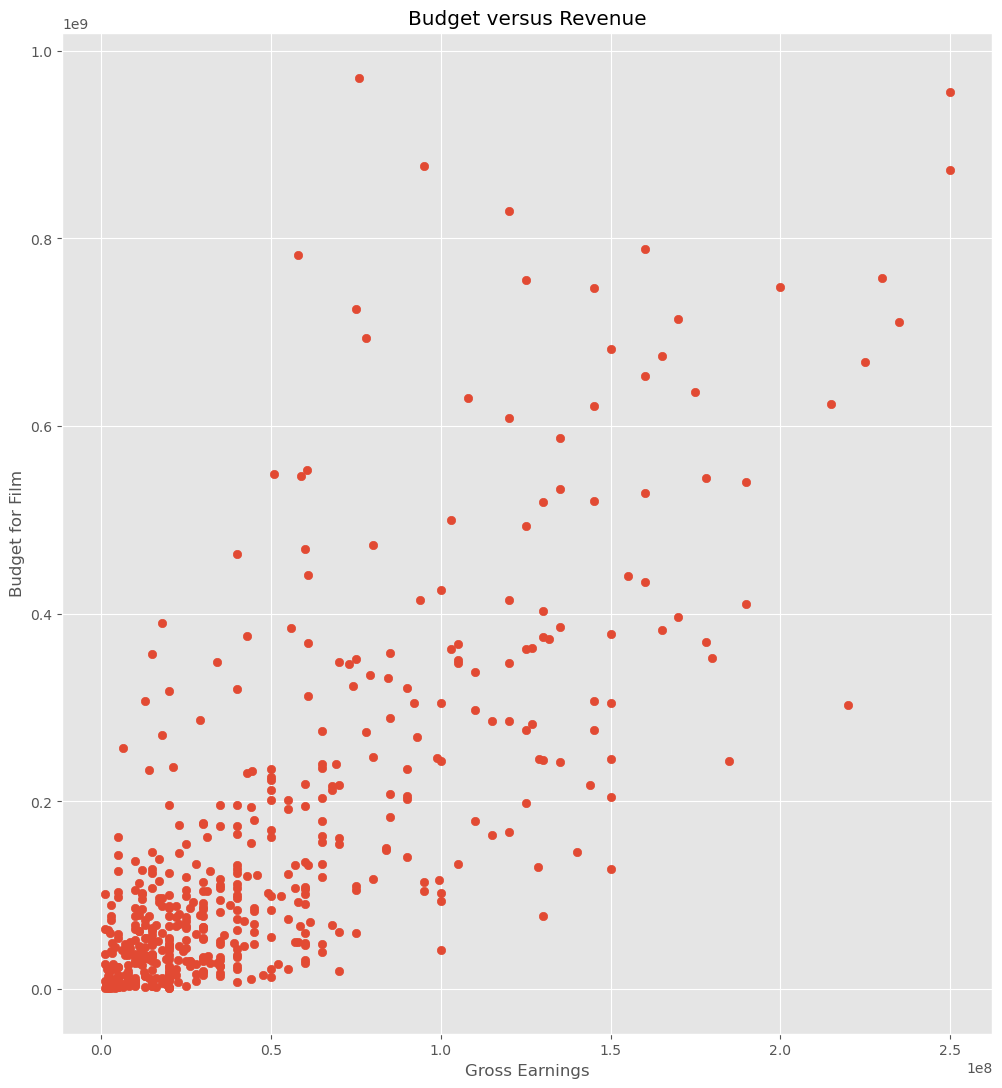

In [64]:

#Scatter plot with budget and revenue


plt.scatter(x=df['Budget ($)'], y=df['Box Office Revenue ($)'])
plt.title("Budget versus Revenue")
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


In [80]:
#Get the data on top
df.head()


,Movie Title,Release Date,Wikipedia URL,Genre (1),Genre (2),Director (1),Director (2),Cast (1),Cast (2),Cast (3),Cast (4),Cast (5),Budget ($),Box Office Revenue ($),Release Year
155,Despicable Me 2,2013-06-20,https://en.wikipedia.org/wiki/Despicable_Me_2,Comedy,Family,Chris Renaud,Pierre Coffin,Steve Carell,Kristen Wiig,Miranda Cosgrove,Dana Gaier,Elsie Fisher,76000000,970800000,2013
300,The Hobbit: The Battle of the Five Armies,2014-12-01,https://en.wikipedia.org/wiki/The_Hobbit:_The_...,Adventure,Fantasy,Peter Jackson,NaN,Ian McKellen,Martin Freeman,Richard Armitage,Evangeline Lilly,Luke Evans,250000000,956000000,2014
53,Ice Age: Continental Drift,2012-07-13,https://en.wikipedia.org/wiki/Ice_Age:_Contine...,Adventure,NaN,Steve Martino,Mike Thurmeier,Ray Romano,John Leguizamo,Denis Leary,Queen Latifah,Seann William Scott,95000000,877000000,2012
462,Batman v Superman: Dawn of Justice,2016-03-19,https://en.wikipedia.org/wiki/Batman_v_Superma...,Action,NaN,Zack Snyder,NaN,Ben Affleck,Henry Cavill,Amy Adams,Jesse Eisenberg,Diane Lane,250000000,872700000,2016
93,The Twilight Saga: Breaking Dawn – Part 2,2012-11-16,https://en.wikipedia.org/wiki/The_Twilight_Sag...,Fantasy,Drama,Bill Condon,NaN,Kristen Stewart,Robert Pattinson,Michael Sheen,Mackenzie Foy,Billy Burke,120000000,829700000,2012


<AxesSubplot:xlabel='Budget ($)', ylabel='Box Office Revenue ($)'>

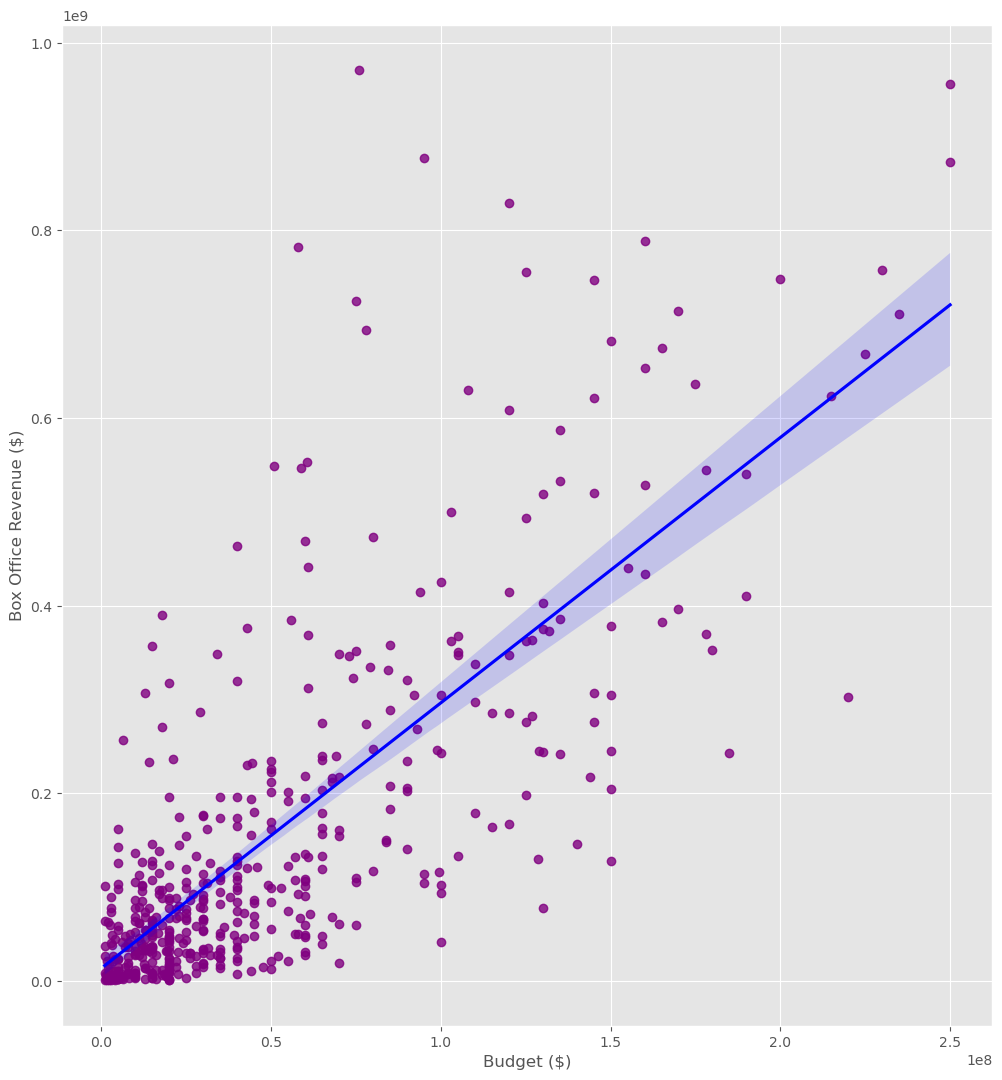

In [69]:
#ploy budget and gross using seaborn
sns.regplot(x='Budget ($)', y ='Box Office Revenue ($)', data=df, scatter_kws={"color":"purple"}, line_kws={"color":"blue"})

In [82]:
#looking at correlation
df.corr(method='spearman')

,Budget ($),Box Office Revenue ($)
Budget ($),1.000000,0.730311
Box Office Revenue ($),0.730311,1.000000


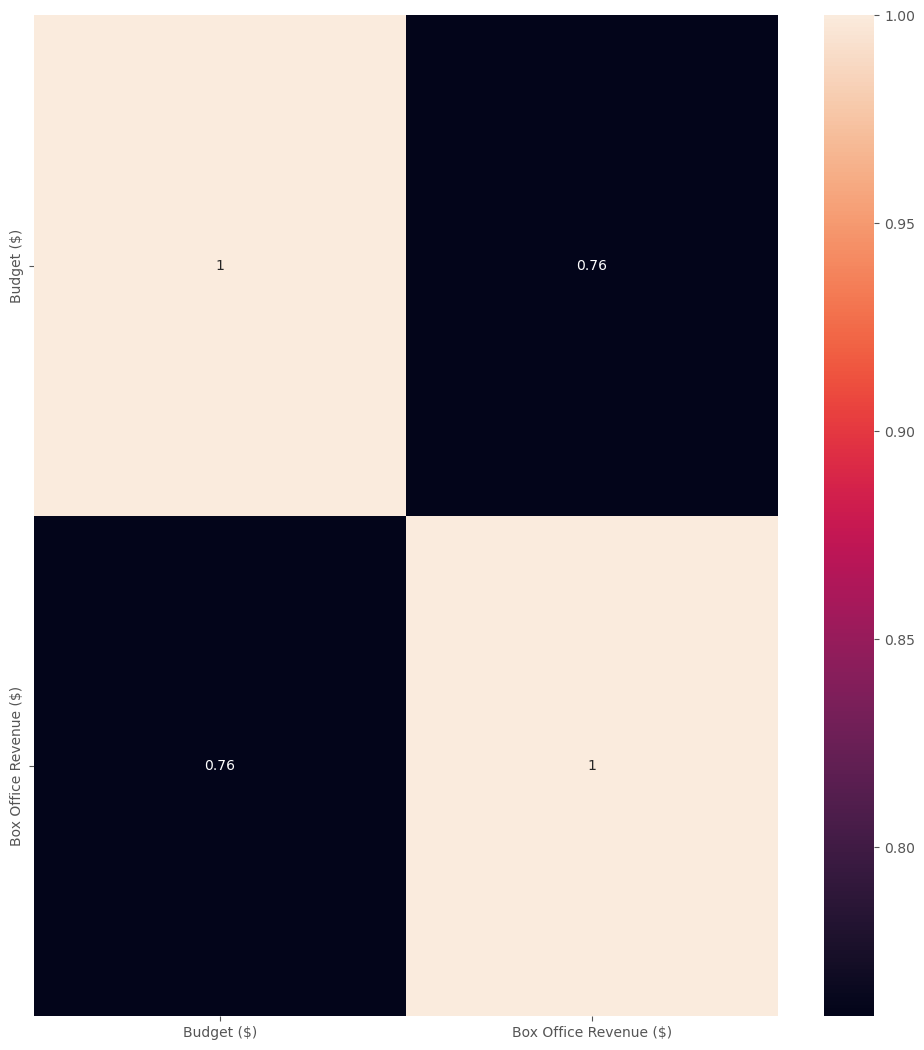

In [75]:
# There is high correlation between budget and gross

correlation_matrix = df.corr(method="pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Budget versus Revenue")
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()